In [12]:
# from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt

#--------------------------------#1--------------------------------------

df = pd.read_csv('EJSCREEN_demo2.csv')

# sum null values with columns starting with 'P_
missing_values = df.isnull().sum()
ej_missing_scores = missing_values[missing_values.index.str.startswith('P_')]

missing_scores_tbl = pd.DataFrame({
    'Environmental Justice Score' : ej_missing_scores.index,
    'Number of Missing Values' : ej_missing_scores.values
})

print(missing_scores_tbl)

   Environmental Justice Score  Number of Missing Values
0                   P_LDPNT_D2                      2623
1                   P_DSLPM_D2                      3219
2                   P_CANCR_D2                      3219
3                    P_RESP_D2                      3219
4                   P_PTRAF_D2                     15380
5                   P_PWDIS_D2                     73719
6                    P_PNPL_D2                      2623
7                    P_PRMP_D2                      2623
8                   P_PTSDF_D2                      2623
9                   P_OZONE_D2                      4287
10                   P_PM25_D2                      4287


There are more missing values of indicators for major direct discharges to water (P_PWDIS_D2) and traffic proximity and volume (P_PTRAF_D2) compared to others. The cause for this may be due to these variables being harder to measure or monitor. Since people have access to free bodies of water such as lakes, rivers, and oceans far from city life, it may be disregarded and left out of data collection. As for traffic proximity and volume, this may be because there is limited information and monitoring in rural areas with low population and thus less traffic.

Average population represented by a census block group: 101332.28913043479


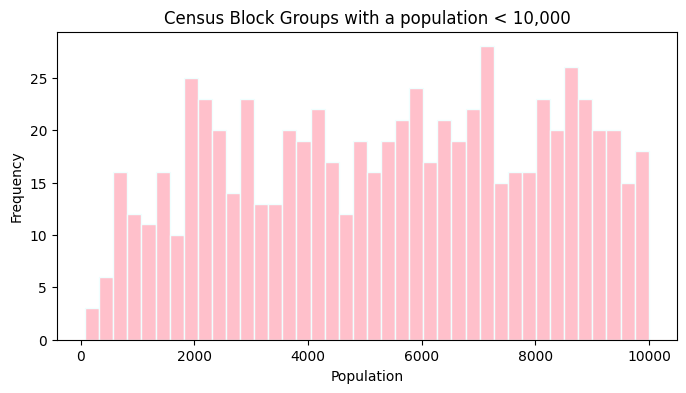

In [105]:
#--------------------------------#2--------------------------------------

# create table with unique fips code and its population, then take mean of popultion column
grouped = df.groupby('fips')['ACSTOTPOP'].sum().reset_index()
average_pop = grouped['ACSTOTPOP'].mean()

print(f"Average population represented by a census block group: {average_pop}")

less_than_10k = grouped[grouped['ACSTOTPOP'] < 10000]

plt.figure(figsize=(8, 4))
plt.hist(less_than_10k['ACSTOTPOP'], bins=40, edgecolor = 'azure', color = 'pink')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Census Block Groups with a population < 10,000')
plt.show()

In [89]:
#--------------------------------#3--------------------------------------

# upload data with state name and corresponding fips
nchs = pd.read_excel("https://github.com/danhammer/envirods/blob/main/data/NCHSURCodes2013.xlsx?raw=true")
nchs = nchs[['FIPS code', 'State Abr.']]
nchs.columns = ['FIPS', 'State']

# filter for the california census block groups
nchs_ca = nchs[nchs['State'] == 'CA']
print(f'Number of census block groups in CA: {len(nchs_ca)}')

# merge into one table with variables, fips, population, and state
merge = df.merge(nchs, how = 'left', left_on = 'fips', right_on = 'FIPS')

# calculate the average resp variable for california and the rest of the pop
ca_merge = merge[merge['State'] == 'CA']
ca_resp_mean = ca_merge['P_RESP_D2'].mean()

rest_merge = merge[merge['State'] != 'CA']
rest_resp_mean = rest_merge['P_RESP_D2'].mean()

print(f'Average Score of "Respiratory Hazard" for CA: {ca_resp_mean}')
print(f'Average Score of "Respiratory Hazard" for rest of the population: {rest_resp_mean}')


Number of census block groups in CA: 58
Average Score of "Respiratory Hazard" for CA: 63.693008538502774
Average Score of "Respiratory Hazard" for rest of the population: 50.08210160483994


The average score for respiratory hazard is higher in california than the average score for the rest of the country. This makes sense as California's population exceeds the population for several combined states. An important factor for example is traffic, which is a contribution to air pollution. See traffic averages below.

In [104]:
ca_traf_mean = ca_merge['P_PTRAF_D2'].mean()
rest_traf_mean = rest_merge['P_PTRAF_D2'].mean()

print(f'Average Traffic Proximity & Volume for CA: {ca_traf_mean}')
print(f'Average Traffic Proximity & Volume for rest of the population: {rest_traf_mean}')

Average Traffic Proximity & Volume for CA: 61.92869987294727
Average Traffic Proximity & Volume for rest of the population: 48.30906614382333


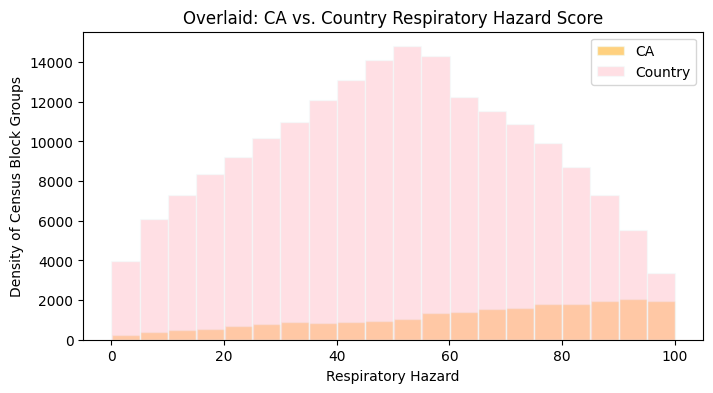

In [102]:
#--------------------------------#4--------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(ca_merge['P_RESP_D2'], bins=20,alpha = 0.5, edgecolor = 'azure', color = 'orange')
plt.hist(rest_merge['P_RESP_D2'], bins=20, alpha = 0.5, edgecolor = 'azure', color = 'pink')
plt.xlabel('Respiratory Hazard Score')
plt.ylabel('Density of Census Block Groups')
plt.title('Overlaid: CA vs. Country Respiratory Hazard Score')
plt.legend(['CA', 'Country'])
plt.show()

The respiratory hazard scores range from 0 to 100, with 0 no hazard and 100 extremely hazardous. The respiratory hazard score density plot for California is left skewed, meaning that there are more census block groups having a score closer to the maximum (>50). The rest of the country has a density plot that is bell shaped, meaning that most census block groups have a mid-range respiratory hazard score (~50).